# MiniProject - TANG YAO BING

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import math as math
from sklearn.model_selection import train_test_split
sb.set() # set the default Seaborn style for graphics

In [2]:
# Importing CSV into notebook
completeData = pd.read_csv('diabetes dataset.csv')

# Creating a new DataFrame that only has datas from individuals with age 18-24
Data = completeData.loc[completeData['Age'] == 1]
Data = pd.DataFrame(Data)

In [3]:
# Removing unwanted columns (AnyHealthcare, NoDocbcCost, Education, Income, Stroke, HeartDiseaseorAttack, DiffWalk)
Data.drop(['AnyHealthcare', 'NoDocbcCost', 'Education', 'Income', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk', 'CholCheck', 'Age'], axis='columns', inplace=True)

In [4]:
print("Data type : ", type(Data))
print("Data dims : ", Data.shape)
print()
Data.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (979, 13)



,Diabetes_binary,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,Sex
5,0.0,0.0,0.0,18.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0
121,0.0,0.0,0.0,36.0,0.0,1.0,1.0,1.0,0.0,2.0,30.0,0.0,1.0
149,0.0,0.0,0.0,22.0,0.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0
201,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
225,0.0,0.0,0.0,21.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0


# MultiVariate Exploration

First we plot the correlation heatmap to visualise the correlation of each variable against Diabetes_binary

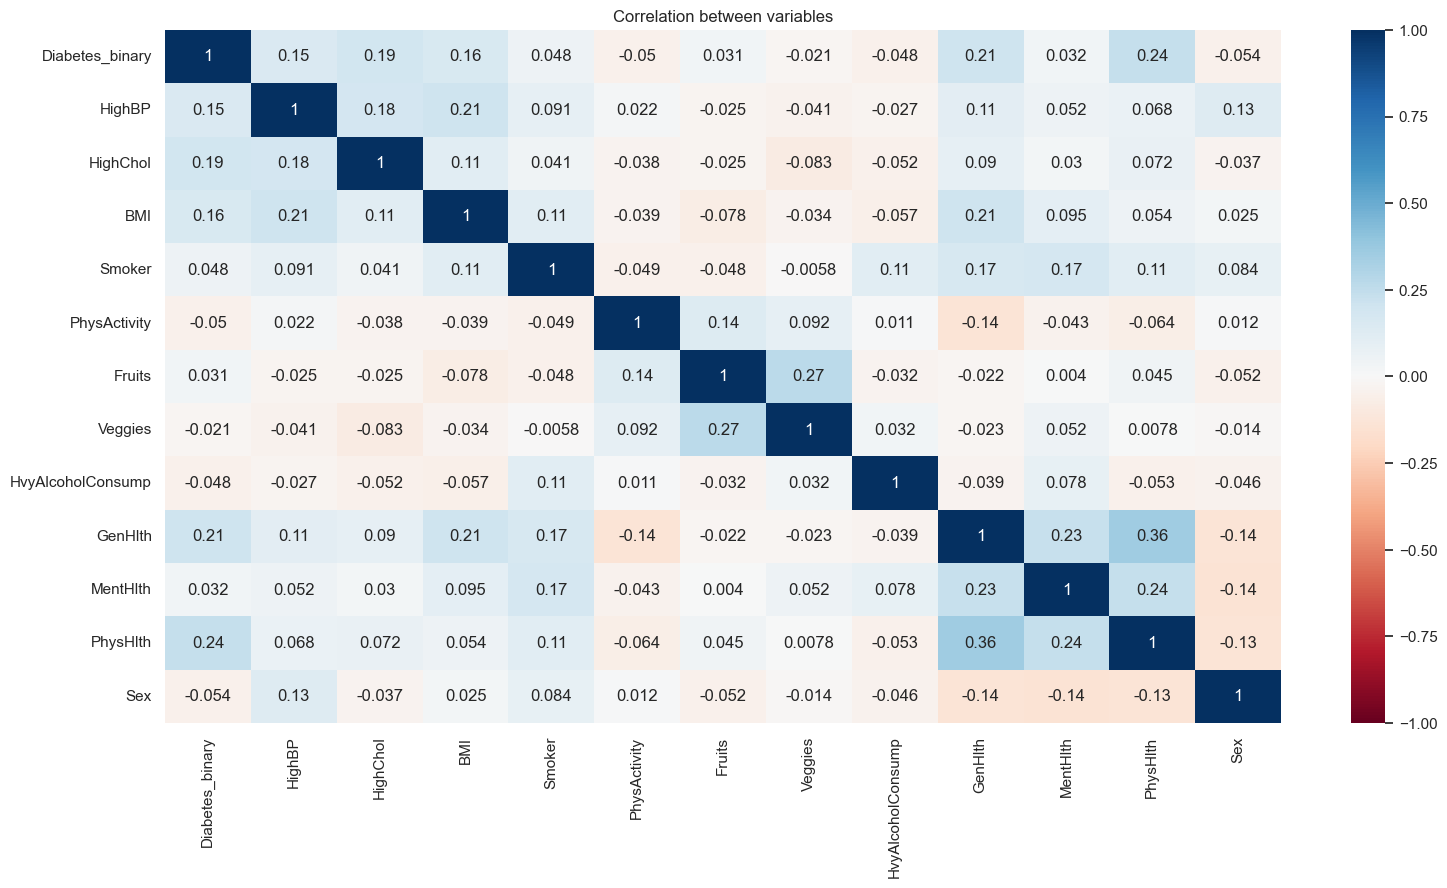

In [5]:
plt.figure(figsize=(18, 9))
# nomralize the color scale
sb.heatmap(Data.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()

Next, we identify the top 5 variable that has the strongest correlation with Diabetes_binary. 

In [6]:
Data.corr()['Diabetes_binary'].abs().sort_values(ascending=False).head(6)

Diabetes_binary    1.000000
PhysHlth           0.237864
GenHlth            0.208867
HighChol           0.190936
BMI                0.162042
HighBP             0.153232
Name: Diabetes_binary, dtype: float64

From the result shown above, we can see that the top 5 variable with the highest correlation values do not show strong correlation between itself and the diabete_binary.

-----------------

From our problem statement, we are curious to find out risk factors that are most predictive of diabetes risk.

We realise that this is a classification problem if we are able to predict if an individual has diabetes. The group of individuals has diabetes is made up of a small percentage and that there is no single variable with strong correlation with the diabete_binary, as explored in our EDA. We will explore classification and anomaly detection machine learning to see if we are able to come up with a model that allow us to predict one's diabete_binary accurately. If we are able build such a model and have those top 5 variable to predict as well as the model, then it is good enough to say that those top 5 variables are risk factor that are the most predictive of diabete risk. This is because we can say that those top 5 variable is able to represent the entire remaining datas.

We are going to explore three models for our machine learning
 - Logisitic Regression  (classification) 
 - One Class SVM (anomaly detection)
 - Isolation Forest (anomaly detection)
 
 -------
 
# Data Preparation for Machine Learning

In [7]:
# diabetic be a new DataFrame with Diabetes_binary column as entries with categorical type
diabetic = Data["Diabetes_binary"].astype('category')
diabetic = pd.DataFrame(diabetic)

# multivariate_data contains all the predictors 
multivariate_data = Data.copy()
multivariate_data.drop(["Diabetes_binary"],axis='columns', inplace=True)
multivariate_data  = pd.DataFrame(multivariate_data)

In [8]:
# Printing the percentage of individuals in the population with diabetes 
diabetic.value_counts(normalize = True)

Diabetes_binary
0.0                0.920327
1.0                0.079673
dtype: float64

From the above result, we understand that in our entire dataset, there is only 8% of the population is diagnosed with diabetes. We can try those population as anomalies. 

In [9]:
print(multivariate_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 5 to 70457
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HighBP             979 non-null    float64
 1   HighChol           979 non-null    float64
 2   BMI                979 non-null    float64
 3   Smoker             979 non-null    float64
 4   PhysActivity       979 non-null    float64
 5   Fruits             979 non-null    float64
 6   Veggies            979 non-null    float64
 7   HvyAlcoholConsump  979 non-null    float64
 8   GenHlth            979 non-null    float64
 9   MentHlth           979 non-null    float64
 10  PhysHlth           979 non-null    float64
 11  Sex                979 non-null    float64
dtypes: float64(12)
memory usage: 99.4 KB
None


In [10]:
# Train Test Split
# X is multivariate_data (Predictors)
# Y is diabetic (Response)

X_train, X_test, y_train, y_test = train_test_split(multivariate_data, diabetic, test_size = 0.2, random_state = 45)

In [11]:
# Printing of the number of datas in each Train Test set
print("The number of datas in the training dateset is ", X_train.shape[0])
print("The number of datas in the test dataset is ", X_test.shape[0])

The number of datas in the training dateset is  783
The number of datas in the test dataset is  196


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)


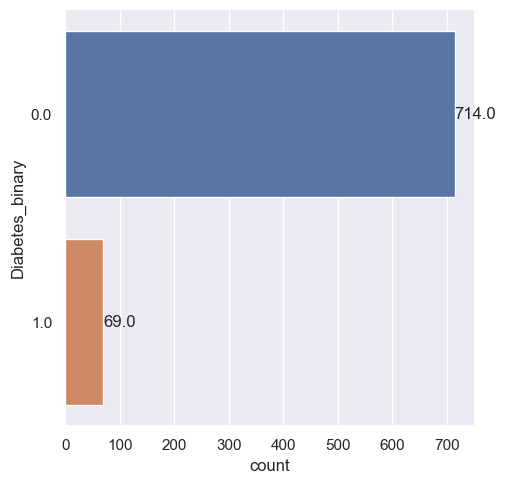

In [12]:
#Count plot for the number of individuals in the dataset that on their diagnosis on their diabetes status. 
train_diabetes = sb.catplot(y = "Diabetes_binary", data = y_train, kind = "count")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = train_diabetes.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# iterate through the axes containers
for c in ax.containers:
    labels = [""+str(v.get_width())  for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')  

From the Count Plot above, we can see that the TRAINING DATASET has 714 records for individuals with no diabetes and 69 records for individuals with diabetes. 

----

# Logistic Regression

Logistic Regression is a machine learning model that is used to find a relationship between each data. Similar to linear regression, it builds a model that identify the relationship between predictor and response for categorical data.

Previously, we identified that our dataset is imbalanced during data preparation, where only 8% of youths are diabetic, causing the data set to be very bias towards youths with no diabetes

To resolve this issue in a supervised classificaiton model like logistic regression, we can make use of Synthetic Minority Oversampling Technique (SMOTE), which is a statistical technique used to synthetically upsample the minority class in our train data to balance it with the other class. This will resolve any biases in our ML as a result of data imbalance to better predict the results.

We first add 730 data of youths who has no diabetes. This is because smote requires the number of added data to be more than the original number of data. Since our train set is 80%, it is rougly around 714 data.

Following, we add 1000 data of youths with diabetes to balance the data so that it will not be bais.

smote is learnt from https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [13]:
# Libraries for Logistic Regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7427745664739884
Mean Squared Error (MSE) 	: 0.25722543352601157
Classification Accuracy 	: 0.7427745664739884

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6938775510204082
Mean Squared Error (MSE) 	: 0.30612244897959184
Classification Accuracy 	: 0.6938775510204082



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (730) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 714)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 714)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458:

<AxesSubplot:>

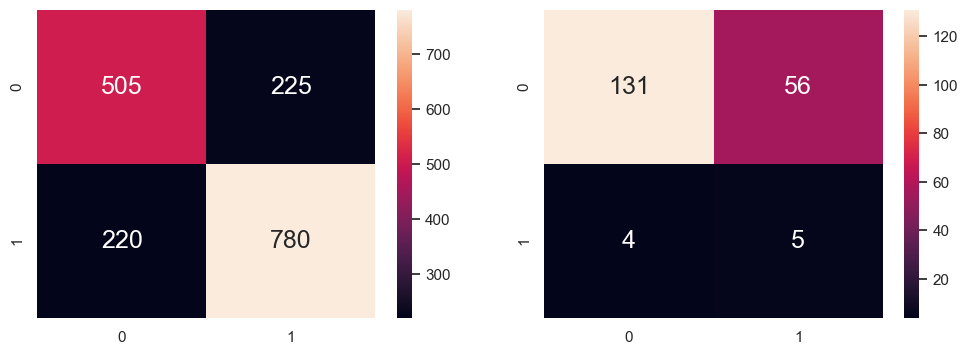

In [14]:
# Balancing number of datas in each class 
sampling_strategy = {0: 730, 1: 1000}
smote = SMOTE(sampling_strategy = sampling_strategy)
X_train_smoted, y_train_smoted = smote.fit_resample(X_train, y_train)

# Training LOGISTIC REGRESSION model with ALL COLUMNS 
logreg = LogisticRegression() 
logreg.fit(X_train_smoted, y_train_smoted)

# Using model to predict result
y_train_pred_smoted = logreg.predict(X_train_smoted)
y_test_pred = logreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_train_smoted, y_train_smoted))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_smoted, y_train_pred_smoted))
print("Classification Accuracy \t:", accuracy_score(y_train_smoted, y_train_pred_smoted))
print("")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Classification Accuracy \t:", accuracy_score(y_test, y_test_pred))
print("")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train_smoted, y_train_pred_smoted),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

From the result above,

This model has similar classification accuracy for the train and test data set. This means that the model works as well as it is supposed to. 

We can see that Logistic Regression model has a 68% chance of predicting accurately if one has diabetes.

------
# One Class SVM

One Class SVM is an unsupervised machine learning model. It identify anomaly datas from the dataset. It identify anomaly by taking points outside a "circle" with the circle's center being at where most datas point lies. 

Note that we choose the value of 0.08 for nu as we found out that only 8% of our population has diabetes. Hence, we want our One Class SVM model to sieve out 8% of anomaly data when building up the model. 

code reference from: https://colab.research.google.com/drive/1o2_ZctA26Kqk2tYhe3zu8lbIoRcO8Hf7?usp=sharing#scrollTo=6cH3gfgnUxcB

In [71]:
# libraris for One Class SVM
from collections import Counter # Data processing (adding on top of numpy and pandas) 

# Model and performance 
from sklearn.svm import OneClassSVM 
from sklearn.metrics import classification_report

In [85]:
# Train the one class support vector machine (SVM) model with ALL COLUMNS 
one_class_svm = OneClassSVM(nu = 0.08, kernel = 'rbf', gamma = 'auto').fit(X_train)

# Predict the anomalies
prediction = one_class_svm.predict(X_test)

# Change the anomalies' value to make it consistent with the true values 
prediction = [1 if i==-1 else 0 for i in prediction]

# Check the model performances 
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.63      0.77       187
         1.0       0.08      0.67      0.14         9

    accuracy                           0.63       196
   macro avg       0.53      0.65      0.45       196
weighted avg       0.93      0.63      0.74       196



From the result above, we can see that the One Class SVM model has a 67% chance of predicting accurately if one has diabetes. 

-----

# Isolation Forest

Isolation Forest is an unsupervised machine learning model. It identify anomaly datas from the dataset. The method of identification is by isolating each individual data points in each branch, the lesser branch needed to isolate a point, it means the point is an anomaly. 

code reference from:

https://grabngoinfo.com/isolation-forest-for-anomaly-detection-and-imbalanced-classification/

In [74]:
# Library for Isolation Forest
from sklearn.ensemble import IsolationForest

In [75]:
# Train the isolation forest model with ALL COLUMNS
if_model = IsolationForest(n_estimators=100, random_state=0).fit(X_train)
# Predict the anomalies
if_prediction = if_model.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
if_prediction = [1 if i== -1 else 0 for i in if_prediction]
# Check the model performance
print(classification_report(y_test, if_prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81       187
         1.0       0.09      0.67      0.16         9

    accuracy                           0.69       196
   macro avg       0.54      0.68      0.49       196
weighted avg       0.94      0.69      0.78       196



From the result above, we can see that Isolation Forest model has a 67% chance of predicting accurately if one has diabetes. 

--------

note: for One Class SVM and Isolation Forest, we look at the recall magnitude. 

### Recall - what percent of the positive cases did you catch 
Recall is the ability of a classifier to find all positive instances. For each class it is define as the ratio of true positives to the sum of tree positives and false negatives 

-------

We  have identified the top 5 variables that has the strongest correlation with one's Diabetic status. 

From the strongest relation to the least is: ( "PhysHlth", "GenHlth", "HighChol", "BMI", "HighBP" )

From our problem statement, We are finding out what risk factors are most predicitve of diabetes risk. Therefore, we will put the top 5 variables to train a data set and see if they will have similar accuracy as the model that uses all the columns when they are used on a test data set. 

From the three models, we notice that all three models have similar accuracy. Hence, we are going to use all three models for our analysis to not be bias. 

----

# Data Preparation ML with Top 5 variable

In [97]:
# Creating a new DataFrame that consist of the top 5 variable 
top_5 = Data[['PhysHlth', 'GenHlth', 'HighChol', 'BMI', 'HighBP']]
top_5 = pd.DataFrame(top_5)
top_5.head()

,PhysHlth,GenHlth,HighChol,BMI,HighBP
5,0.0,2.0,0.0,18.0,0.0
121,0.0,2.0,0.0,36.0,0.0
149,0.0,3.0,0.0,22.0,0.0
201,0.0,1.0,0.0,29.0,0.0
225,0.0,2.0,0.0,21.0,0.0


In [81]:
# Train Test Split
# X is top_5
# Y is diabetic

top_5_X_train, top_5_X_test, top_5_y_train, top_5_y_test = train_test_split(top_5, diabetic, test_size = 0.2, random_state = 45)

-----
# Machine Learning with Top 5 Variable

# Logistic Regression

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7052023121387283
Mean Squared Error (MSE) 	: 0.2947976878612717
Classification Accuracy 	: 0.7052023121387283

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6530612244897959
Mean Squared Error (MSE) 	: 0.3469387755102041
Classification Accuracy 	: 0.6530612244897959



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (730) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 714)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 714)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:>

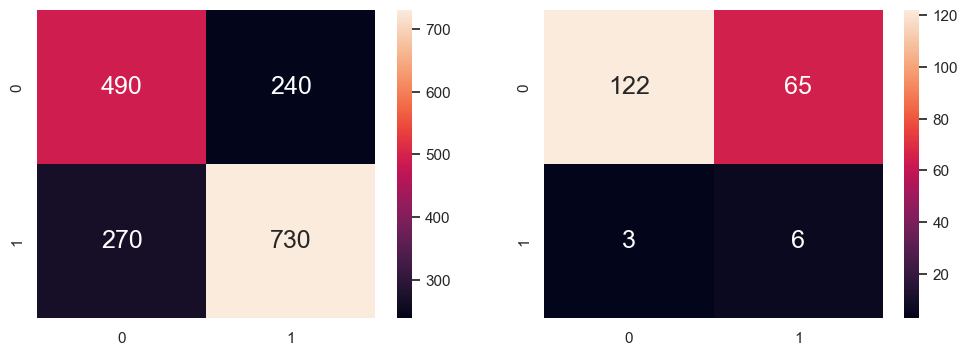

In [88]:
# Balancing number of datas in each class 
sampling_strategy = {0: 730, 1: 1000}
smote = SMOTE(sampling_strategy = sampling_strategy)
top_5_X_train_smoted, top_5_y_train_smoted = smote.fit_resample(top_5_X_train, top_5_y_train)

# Training LOGISTIC REGRESSION model with TOP 5 VARIABLE
logreg = LogisticRegression() 
logreg.fit(top_5_X_train_smoted, top_5_y_train_smoted)

# Using model to predict result
top_5_y_train_pred_smoted = logreg.predict(top_5_X_train_smoted)
top_5_y_test_pred = logreg.predict(top_5_X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(top_5_X_train_smoted, top_5_y_train_smoted))
print("Mean Squared Error (MSE) \t:", mean_squared_error(top_5_y_train_smoted, top_5_y_train_pred_smoted))
print("Classification Accuracy \t:", accuracy_score(top_5_y_train_smoted, top_5_y_train_pred_smoted))
print("")

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(top_5_X_test, top_5_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(top_5_y_test, top_5_y_test_pred))
print("Classification Accuracy \t:", accuracy_score(top_5_y_test, top_5_y_test_pred))
print("")

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(top_5_y_train_smoted, top_5_y_train_pred_smoted),
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(top_5_y_test, top_5_y_test_pred), 
            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

The model with Top 5 variable has similar classification accuracy for the train and test data set. This means that the model works as well as it is supposed to. 

We can see this Logistic Regression model with Top 5 variable has a 68% chance of predicting accurately if one has diabetes.


# One Class SVM

In [86]:
# Train the one class support vector machine (SVM) model with TOP 5 VARIABLE
top_5_one_class_svm = OneClassSVM(nu = 0.08, kernel = 'rbf', gamma = 'auto').fit(top_5_X_train)

# Predict the anomalies
top_5_prediction = top_5_one_class_svm.predict(top_5_X_test)

# Change the anomalies' value to make it consistent with the true values 
top_5_prediction = [1 if i==-1 else 0 for i in top_5_prediction]

# Check the model performances 
print(classification_report(top_5_y_test, top_5_prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82       187
         1.0       0.10      0.67      0.17         9

    accuracy                           0.71       196
   macro avg       0.54      0.69      0.50       196
weighted avg       0.94      0.71      0.79       196



From this One Class SVM Model with top 5 variables, this model is able to accurately predict 67% of the anomaly in the test data. 

----
# Isolation Forest

In [87]:
# Train the isolation forest model with TOP 5 VARIABLE
top_5_if_model = IsolationForest(n_estimators=100, random_state=0).fit(top_5_X_train)
# Predict the anomalies
top_5_if_prediction = top_5_if_model.predict(top_5_X_test)
# Change the anomalies' values to make it consistent with the true values
top_5_if_prediction = [1 if i== -1 else 0 for i in top_5_if_prediction]
# Check the model performance
print(classification_report(top_5_y_test, top_5_if_prediction))

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84       187
         1.0       0.09      0.56      0.16         9

    accuracy                           0.73       196
   macro avg       0.53      0.65      0.50       196
weighted avg       0.93      0.73      0.81       196



From this Isolation Forest Model with top 5 variables, this model is able to accurately predict 56% of the anomaly in the test data. 

-----

From the results, two out of the three models when using just the Top 5 variable has similar accuracy result as compare to the model that uses all variables. This shows that the top 5 variable is a good representation and an indicator to tell if one is at risk to be diagnosed with diabetes. 

One possible reason why Isolation Forest might not be able to have similar accuracy data might be due to it's process of finding anomaly. The forest is build with maximum depth 5. Hence, the branching to isolated each node might not be that extensive. This might be the caused for the less accurate value. 

-----

# In conclusion 

In conclusion, individuals aged 18-24 are not likely to be diagnosed with diabetes but their risk is not negligible. 

For this project, we performed (EDA) on our dataset and derived useful insights. These insights were then used as inputs for three different machine learning models. The models included a classification model and an anomaly detection model, which use supervised and unsupervised learning, respectively, to predict whether an individual is diabetic or not.

This helped us to identify the 5 key health indicators stated here, to predict diabetes.
By focusing on these 5 key health indicators, it helps us in the fight against diabetes by reducing the scope of our attention and allowing us to be more targetted in our effort to prevent the diabetes.

